# Clustering de documents

## Imports

In [21]:
import collections
import os
import string
import sys
import re

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [22]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/ilaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ilaria/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#check repertoire courant et son contenu
import os

print("Répertoire courant :", os.getcwd())
print("Contenu du dossier courant :", os.listdir())


Répertoire courant : /Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/tps/tp3
Contenu du dossier courant : ['s3_word_embeddings.ipynb', 'README.md', 's1_classification.ipynb', 's2_clustering.ipynb']


In [53]:
data_path = "../../data/txt/"


## Choisir une décennie

In [54]:
DECADE = '1990'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [55]:
import os
print(os.getcwd())


/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/tps/tp3


In [56]:
# Lister tous les fichiers correspondant à la décennie
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE}" in f]
#decade moins le denrier caractere qui est 0 donc on a 199 etc...donc on contruit un corput avec les fichers de la decennei année 50

In [57]:
# Exemple de fichiers
files[:5]

[]

In [58]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [59]:
# Exemple de textes
texts[0][:400]

IndexError: list index out of range

## Vectoriser les documents à l'aide de TF-IDF

In [10]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [11]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [ ]:
tfidf_vectors = vectorizer.fit_transform(texts)
#on recupere nos vecteurs sur les textes et on va trouevr la matrice

/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Détail de la matrice
tfidf_vectors
# numero documents 1000,  numeros mots 3506

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 703537 stored elements and shape (1000, 3506)>

### Imprimer le vecteur tf-IDF du premier document

In [ ]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)
#voir comment on petucalculer les distances entres les vecteurs pour s'entraine r et comprendre ce modele
#calculer l'angle des vecteus qui donne le cosinus, mêmes vecteurs la distance est 0; distance (0 veut dire qucoune distance ou 1)
#  et similarité (-1 à 1) donce les deux ne sont pas à confondre

parti           0.276938
loyer           0.152177
janvier         0.148006
populaire       0.147153
propriétaire    0.143666
                  ...   
habitants       0.000000
agit            0.000000
haecht          0.000000
hainaut         0.000000
#               0.000000
Length: 3506, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [15]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [16]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [17]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [18]:
tfidf_array = tfidf_vectors.toarray()

In [19]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.03783743], shape=(3506,))

In [20]:
# Vecteur du document 1
tfidf_array[1]

array([0.       , 0.0067047, 0.       , ..., 0.       , 0.       ,
       0.       ], shape=(3506,))

In [21]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.9314339868905285)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [30]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [31]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [32]:
clusters = km_model.fit_predict(tfidf_vectors)
#fit_predic renvoye des clusters poru chaque document

In [25]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [26]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1950-01-07_01-00013.txt',
               'KB_JB838_1950-02-18_01-00014.txt',
               'KB_JB838_1950-02-28_01-00012.txt',
               'KB_JB838_1950-03-03_01-00013.txt',
               'KB_JB838_1950-03-15_01-00012.txt',
               'KB_JB838_1950-05-24_01-00014.txt',
               'KB_JB838_1950-06-14_01-00014.txt',
               'KB_JB838_1950-07-02_01-00018.txt',
               'KB_JB838_1950-11-24_01-00015.txt',
               'KB_JB838_1950-11-28_01-00012.txt',
               'KB_JB838_1950-11-29_01-00013.txt',
               'KB_JB838_1950-12-20_01-00013.txt',
               'KB_JB838_1950-12-24_01-00017.txt',
               'KB_JB838_1951-01-21_01-00018.txt',
               'KB_JB838_1951-03-06_01-00014.txt',
               'KB_JB838_1951-08-24_01-00013.txt',
               'KB_JB838_1951-09-04_01-00012.txt',
               'KB_JB838_1951-09-08_01-00019.txt',
               'KB_JB838_1951-09-09_01-00020.txt',
               'KB_JB838_1951-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [27]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [28]:
reduced_vectors[:10]

array([[-0.32580699,  0.11404392],
       [ 0.11344714, -0.3021103 ],
       [ 0.44352734, -0.25255196],
       [-0.23898552, -0.03761847],
       [-0.05189779, -0.10505014],
       [ 0.61297815,  0.50406047],
       [-0.20410631, -0.03508368],
       [-0.19454707, -0.03815613],
       [ 0.62392888,  0.45588681],
       [ 0.15642298, -0.01432992]])

### Générer le plot

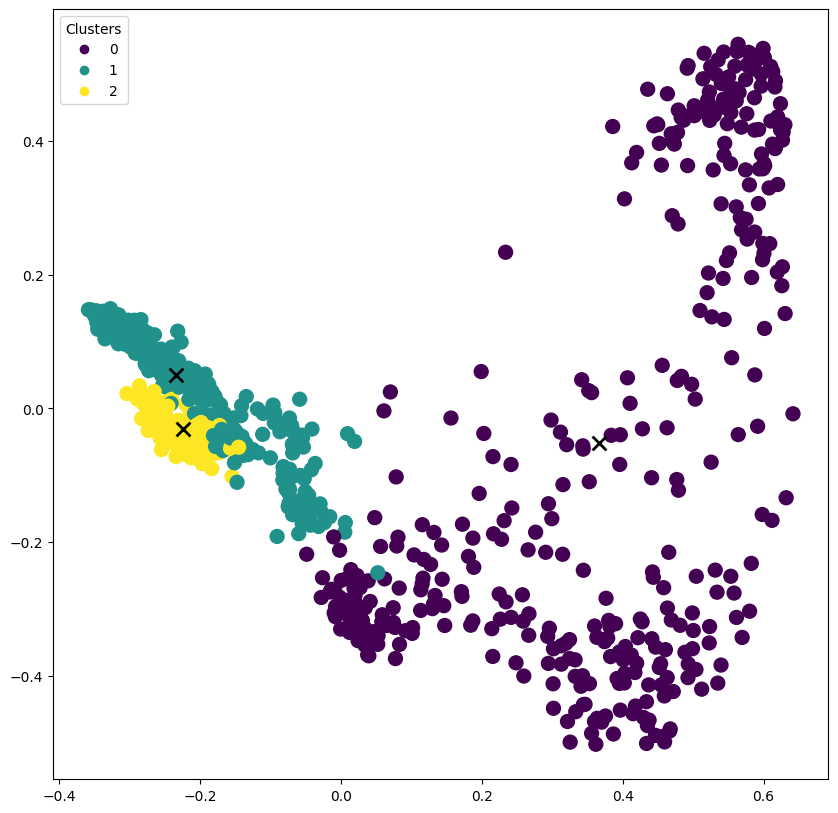

In [ ]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

#par l'image: on se rend compte qu epeut êre 5 cluster etions trop et put etre meuilleur resultat en reduisant le clistur no pas à 5
#de manière iterative on peut voir si on peut organiser l'ensemble dans un ensemble plus coherent (exercice pour le tp)